In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

netflix_df=pd.read_csv(r'C:\Users\USER\udemy\Netflix_Userbase.csv')

In [2]:
#How many rows and columns are in the dataset?
netflix_df.shape

(2500, 10)

In [3]:
#What are the data types of each column?
netflix_df.dtypes

User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

In [5]:
#Are there any missing values in the dataset? If so, in which columns?
netflix_df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [14]:
#What is the distribution of users by country?
user_dist=netflix_df.groupby('Country')['User ID'].count()
user_dist

Country
Australia         183
Brazil            183
Canada            317
France            183
Germany           183
Italy             183
Mexico            183
Spain             451
United Kingdom    183
United States     451
Name: User ID, dtype: int64

In [17]:
#How many unique values are there in each categorical column?
unique_values = netflix_df.select_dtypes(include=['object', 'category']).nunique()
unique_values

Subscription Type      3
Join Date            300
Last Payment Date     26
Country               10
Gender                 2
Device                 4
Plan Duration          1
dtype: int64

In [20]:
#What is the most common subscription plan among users?
most_common_subscription_plan=netflix_df.groupby('Subscription Type')['User ID'].count()
most_common_subscription_plan
most_common_subscription_plan.nlargest(1)

Subscription Type
Basic    999
Name: User ID, dtype: int64

In [22]:
#What is the average age of users?
av_age_of_user=netflix_df['Age'].mean()
av_age_of_user

np.float64(38.7956)

In [24]:
#and what is the age distribution?
age_dist=netflix_df['Age'].describe()
age_dist

count    2500.000000
mean       38.795600
std         7.171778
min        26.000000
25%        32.000000
50%        39.000000
75%        45.000000
max        51.000000
Name: Age, dtype: float64

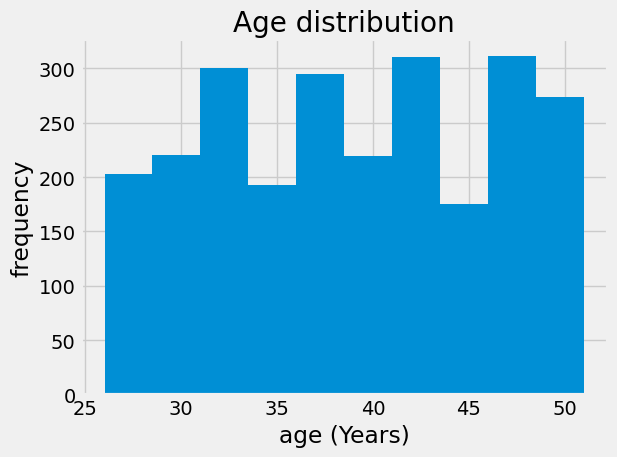

In [58]:
#age distribution visualization
plt.hist(netflix_df['Age'], label='age')
plt.title('Age distribution')
plt.xlabel('age (Years)')
plt.ylabel('frequency')
plt.tight_layout()

In [46]:
#What is the average, median, and standard deviation of user ages?
netflix_df['Age'].agg(['mean','median','std'])

mean      38.795600
median    39.000000
std        7.171778
Name: Age, dtype: float64

In [50]:
#How does the average monthly subscription fee vary across different countries?
Av_month_sub_fee_by_count=netflix_df.groupby('Country')['Monthly Revenue'].mean().sort_values(ascending=False)
Av_month_sub_fee_by_count

Country
United Kingdom    12.666667
Italy             12.661202
France            12.606557
United States     12.558758
Spain             12.554324
Brazil            12.486339
Canada            12.460568
Australia         12.409836
Germany           12.349727
Mexico            12.224044
Name: Monthly Revenue, dtype: float64

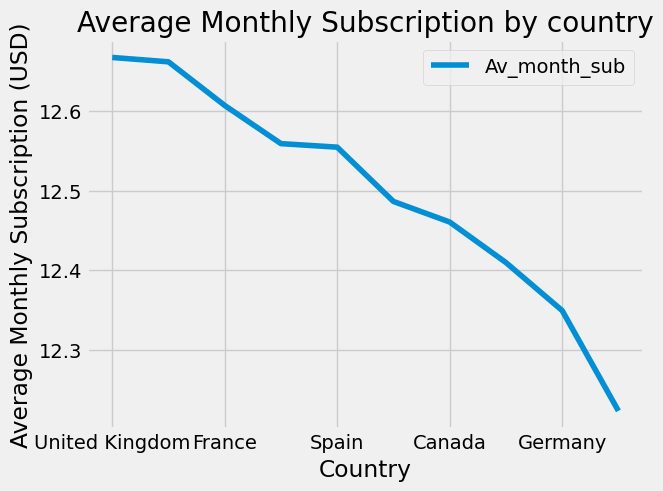

In [59]:
#How does the average monthly subscription fee vary across different countries? (VISUALIZATION)
Av_month_sub_fee_by_count.plot(kind='line', label='Av_month_sub')
plt.ylabel('Average Monthly Subscription (USD)')
plt.title('Average Monthly Subscription by country')
plt.legend()

In [60]:
netflix_df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [63]:
#What is the trend in new user sign-ups over the months/years?
netflix_df['Join Date']=pd.to_datetime(netflix_df['Join Date'], format='%d-%m-%y')
netflix_df['Last Payment Date']=pd.to_datetime(netflix_df['Last Payment Date'], format='%d-%m-%y')

In [65]:
#netflix_df.dtypes

In [68]:
#What is the trend in new user sign-ups over the months?
netflix_df['Monthly']=netflix_df['Join Date'].dt.to_period('M')
monthly_sub_trend=netflix_df.groupby('Monthly')['User ID'].count()
monthly_sub_trend

Monthly
2021-09      3
2021-10      3
2021-11      4
2021-12      4
2022-01      8
2022-02      5
2022-03     13
2022-04     19
2022-05     40
2022-06    295
2022-07    481
2022-08    382
2022-09    367
2022-10    521
2022-11    295
2022-12     22
2023-01     12
2023-02      7
2023-03      6
2023-04      5
2023-05      5
2023-06      3
Freq: M, Name: User ID, dtype: int64

Text(0.5, 0, 'months')

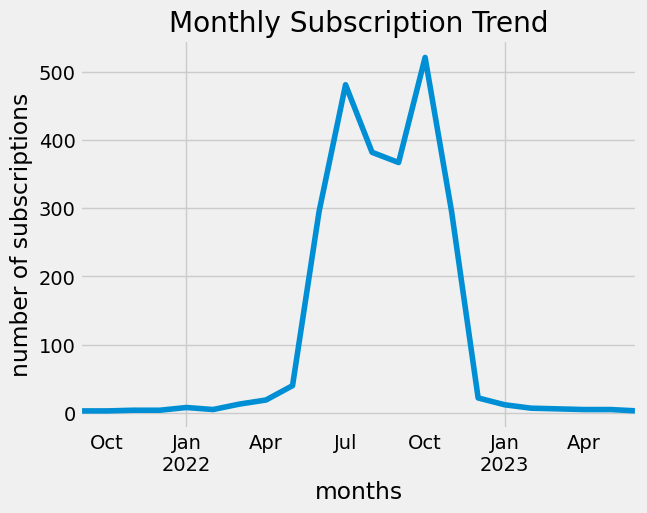

In [70]:
#What is the trend in new user sign-ups over the months? (VISUALIZATION)
monthly_sub_trend.plot(label='sub_trend')
plt.title('Monthly Subscription Trend')
plt.ylabel('number of subscriptions')
plt.xlabel('months')

In [71]:
#What is the trend in new user sign-ups over the years?
netflix_df['Yearly']=netflix_df['Join Date'].dt.to_period('Y')
yearly_sub_trend=netflix_df.groupby('Yearly')['User ID'].count()
yearly_sub_trend

Yearly
2021      14
2022    2448
2023      38
Freq: Y-DEC, Name: User ID, dtype: int64

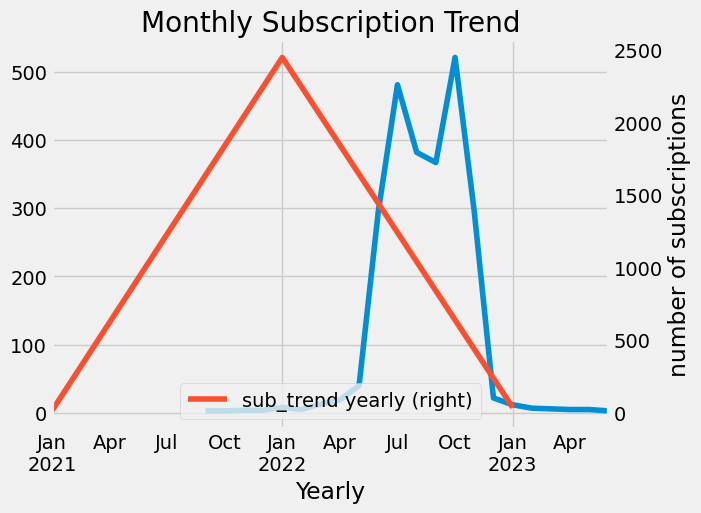

In [74]:
#What is the trend in new user sign-ups over the months/years? (VISUALIZATION)
monthly_sub_trend.plot(label='sub_trend monthly')
yearly_sub_trend.plot(label='sub_trend yearly', secondary_y=True)
plt.title('Monthly Subscription Trend')
plt.ylabel('number of subscriptions')
plt.xlabel('months')
plt.legend()

In [75]:
netflix_df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration', 'Monthly', 'Yearly'],
      dtype='object')

In [93]:

#Do users in certain countries tend to choose higher-tier plans more often?
plan_distribution=netflix_df.groupby(['Country','Subscription Type'])['User ID'].count()
plan_distribution


Country         Subscription Type
Australia       Basic                 31
                Premium              101
                Standard              51
Brazil          Basic                146
                Premium               33
                Standard               4
Canada          Basic                145
                Premium               88
                Standard              84
France          Basic                 36
                Premium              147
Germany         Basic                149
                Premium                3
                Standard              31
Italy           Basic                176
                Premium                4
                Standard               3
Mexico          Basic                  4
                Standard             179
Spain           Basic                110
                Premium              212
                Standard             129
United Kingdom  Basic                  3
                Standar

In [89]:
total_users_per_country = netflix_df.groupby('Country')['User ID'].count()
total_users_per_country

Country
Australia         183
Brazil            183
Canada            317
France            183
Germany           183
Italy             183
Mexico            183
Spain             451
United Kingdom    183
United States     451
Name: User ID, dtype: int64

In [107]:
high_tier_users=netflix_df[netflix_df['Subscription Type'].isin(['Premium','Standard'])].groupby('Country')['User ID'].count()
high_tier_users

Country
Australia         152
Brazil             37
Canada            172
France            147
Germany            34
Italy               7
Mexico            179
Spain             341
United Kingdom    180
United States     252
Name: User ID, dtype: int64

In [99]:
high_tier_proportion=(total_users_per_country/high_tier_users).fillna(0).sort_values(ascending=False)
high_tier_proportion

Country
Italy             26.142857
Germany            5.382353
Brazil             4.945946
Canada             1.843023
United States      1.789683
Spain              1.322581
France             1.244898
Australia          1.203947
Mexico             1.022346
United Kingdom     1.016667
Name: User ID, dtype: float64